In [1]:
import pandas as pd

# Load dataset from .data file
df = pd.read_csv("/content/2_letter_recognition.data", header=None)

# Assign column names (assuming first column is the letter label)
column_names = ['letter'] + [f'feature_{i}' for i in range(1, 17)]
df.columns = column_names

# Display first few rows
print(df.head())

  letter  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0      T          2          8          3          5          1          8   
1      I          5         12          3          7          2         10   
2      D          4         11          6          8          6         10   
3      N          7         11          6          6          3          5   
4      G          2          1          3          1          1          8   

   feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0         13          0          6           6          10           8   
1          5          5          4          13           3           9   
2          6          2          6          10           3           7   
3          9          4          6           4           4          10   
4          6          6          6           6           5           9   

   feature_13  feature_14  feature_15  feature_16  
0           0           8         

In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
label_encoder = LabelEncoder()
df['letter'] = label_encoder.fit_transform(df['letter'])  # Encode letters as numbers


In [4]:
# Split into features & labels
X = df.iloc[:, 1:].values  # Features (pixel intensities)
y = df.iloc[:, 0].values   # Labels (encoded letters)


In [5]:
# Convert labels to categorical format
y = keras.utils.to_categorical(y, num_classes=len(label_encoder.classes_))



In [6]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [7]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
# Build Deep Neural Network Model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(label_encoder.classes_), activation='softmax')  # Multi-class classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)



Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4593 - loss: 2.0561 - val_accuracy: 0.7828 - val_loss: 0.7619
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7926 - loss: 0.7202 - val_accuracy: 0.8465 - val_loss: 0.5392
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8530 - loss: 0.5041 - val_accuracy: 0.8770 - val_loss: 0.4247
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8774 - loss: 0.4194 - val_accuracy: 0.8947 - val_loss: 0.3601
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8966 - loss: 0.3489 - val_accuracy: 0.9047 - val_loss: 0.3223
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9145 - loss: 0.2926 - val_accuracy: 0.9118 - val_loss: 0.2969
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9262 - loss: 0.2567 - val_accuracy: 0.9215 - val_loss: 0.2659
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9353 - loss: 0.2193 - val_accuracy: 0.

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9528 - loss: 0.1512
Test Accuracy: 0.9567


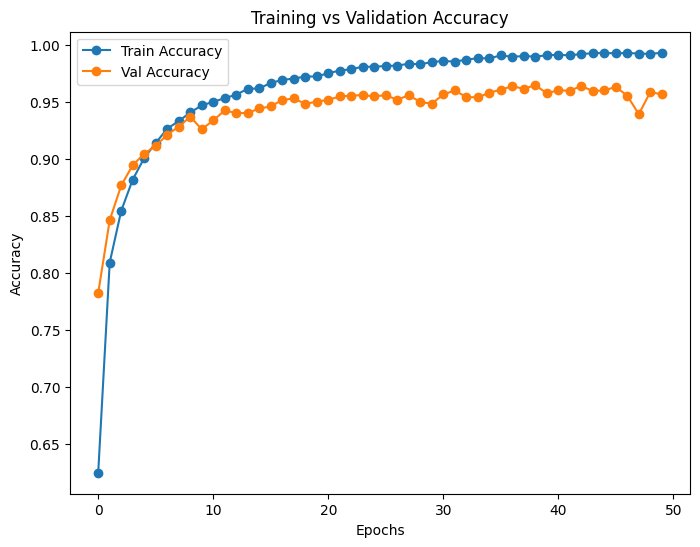

In [12]:
# 1️⃣ Plot Training vs Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


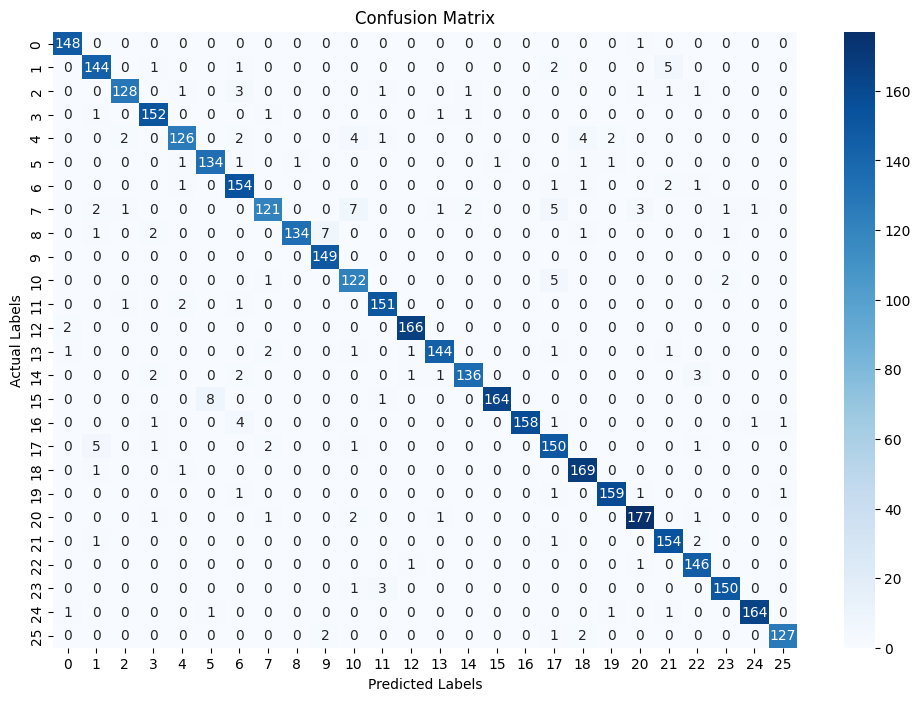

In [13]:
# 2️⃣ Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()
